In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series,DataFrame
import scipy
from scipy import stats
import matplotlib as mpl
import seaborn as sns
import sklearn

In [2]:
titanic_df = pd.read_csv("C:/Users/Marthinz/Documents/Data Analysis practice/titanic/train.csv")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

5.) What factors helped someone survive the sinking?
So let's start with the first question: Who were the passengers on the titanic?

In [6]:
px.histogram(titanic_df, x="Sex",barmode="group")


In [7]:
px.histogram(titanic_df, x="Pclass", color="Sex", barmode="group")

In [8]:
import plotly.express as px
fig = px.histogram(titanic_df, x="Sex", color="Pclass", barmode="group")
fig.show()

In [36]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column

# Revisit Lecture 45 for a refresher on how to do this.

# First let's make a function to sort through the sex 
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    

# We'll define a new column called 'person', remember to specify axis=1 for columns and not index
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [10]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


Excellent! Now we have seperated the passengers between female,male,and child. This will be important later on beacuse of the famous "Women and children first policy"!

In [11]:
#this time we plot using person as the hue
px.histogram(titanic_df,x="Pclass", color='person', barmode="group")

interesting, quite a bit of children in 3rd class and not so many in 1st! How about we create a distribution of the ages to get a more precise picture of the who the passengers were.

I'm going to be using more of plotly and seaborn for my visualisation

In [12]:
#titanic_df["Age"].hist(bins=20)
px.histogram(titanic_df, "Age", nbins=20)

Getting the values of people in each category(Male, Female, Children)

In [13]:
titanic_df["person"].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

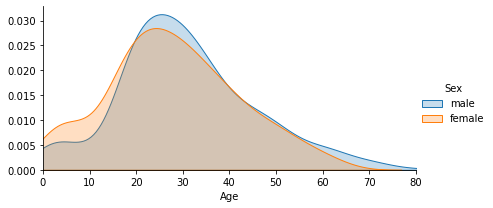

In [14]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=2)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

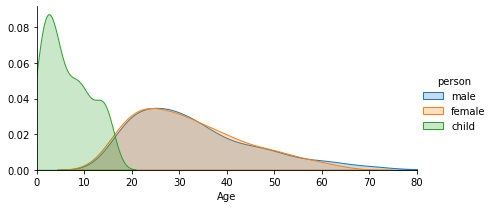

In [15]:
# We could have done the same thing for the 'person' column to include children:

fig = sns.FacetGrid(titanic_df, hue="person",aspect=2)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

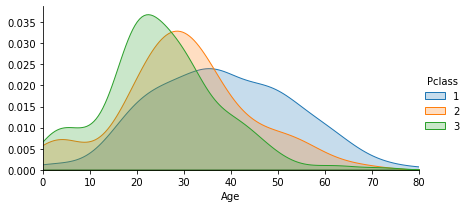

In [16]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=2)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

We've gotten a pretty good picture of who the passengers were based on Sex, Age, and Class. So let's move on to our 2nd question: What deck were the passengers on and how does that relate to their class?

In [56]:
 #First we'll drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

Notice we only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)

In [59]:
#trying to create an empty list that takes the first element of the deck
#to classify them into leveles "A,B,C,D,E,F,G"
levels = []

#use a for loop for iteration
for level in deck:
    levels.append(level[0])

#make the data a dataframe and make the columns the cabin from the titanic df     
cabin_df = DataFrame(levels)
cabin_df.columns = ["Cabin"]
cabin_df.sort_index(inplace=True, axis=1)

#then we visualize the number of people in each cabin class
px.histogram(cabin_df, "Cabin",barmode="group").update_xaxes(categoryorder="total ascending")
#TODO: fix the ordering such that the values are sorted based on the A...group

In [39]:
#we drop the T values in the cabin because they're not significant
cabin_df = cabin_df[cabin_df.Cabin != "T"]

#then we plot it
px.histogram(cabin_df, x="Cabin", color_discrete_sequence=["darkorange","powderblue", "purple", "red", "rosybrown","royalblue"]).update_xaxes(categoryorder="total ascending")


In [53]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [22]:
#where the passengers came from
px.histogram(titanic_df, x="Embarked", color="Pclass", barmode="group").update_xaxes(categoryorder="total ascending")

In [54]:
#who is alone and who was with family
titanic_df.head()
#sibssp column indicate they had siblings for 1, and 0 for don't have siblings
#those with parch are either family or not


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [24]:
#here we define alone by adding up the columns of the sibs and parch
titanic_df["Alone"] = titanic_df.SibSp + titanic_df.Parch

In [25]:
titanic_df["Alone"]

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [28]:
#titanic_df["Alone"].loc[titanic_df["Alone"] >0] = "With Family"
titanic_df["Alone"].loc[titanic_df["Alone"]== 0] = "Alone"


In [29]:
titanic_df["Alone"]

0      With Family
1      With Family
2            Alone
3      With Family
4            Alone
          ...     
886          Alone
887          Alone
888    With Family
889          Alone
890          Alone
Name: Alone, Length: 891, dtype: object

In [33]:
px.histogram(titanic_df, x="Alone")

In [40]:
#what factors contribute to someone dying
titanic_df["Survivor"] = titanic_df.Survived.map({0:"no", 1:"yes"})
px.histogram(titanic_df, x="Survivor")

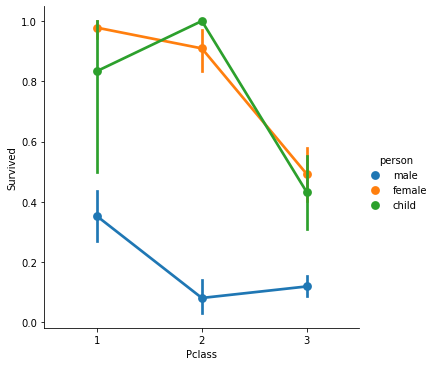

In [46]:
#lets see the if class was an influence in surviving
#px.histogram(titanic_df, x=["Pclass","Survived"])
#we also controlled for the gender
sns.catplot(x="Pclass", y="Survived", data=titanic_df, kind="point", hue="person")

from the visualisation above it is clear that male survival rate was the lowest irrespective of the class, though the men in the first class had higher survival rate than their peers in the third class, their survival rate was not as much as women even in the third class

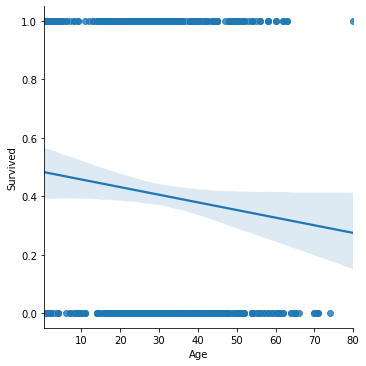

In [48]:
sns.lmplot(x = "Age", y = "Survived", data=titanic_df)

Interesting Insight here!. one can note that for people who did not survive, the older, the person,the fewer the chances of survival!

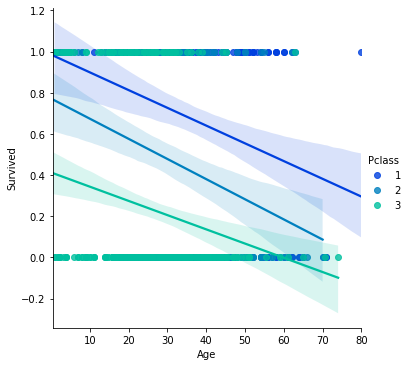

In [49]:
sns.lmplot(x = "Age", y = "Survived", data=titanic_df, hue="Pclass", palette="winter")

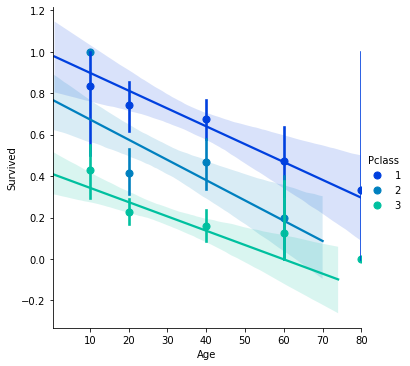

In [50]:
#clean the data to make it more well sorted
#create a list to make the age distribution and pass as bins in the plot
generations = [10,20,40,60,80]

sns.lmplot(x="Age",y="Survived", hue="Pclass", data=titanic_df, palette="winter", x_bins = generations)

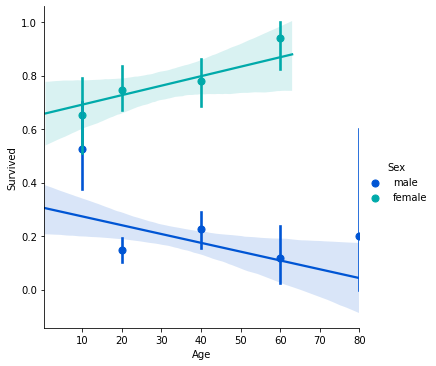

In [52]:
#Age versus sex survival rate
sns.lmplot(x="Age", y="Survived", hue ="Sex", data=titanic_df,
          palette="winter", x_bins = generations)

Answer these questions
1.) Did the deck have an effect on the passenger survival rate? Did this answer match up with your intuition?
2.) Did having a family member increase the odds of surviving the crash?

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

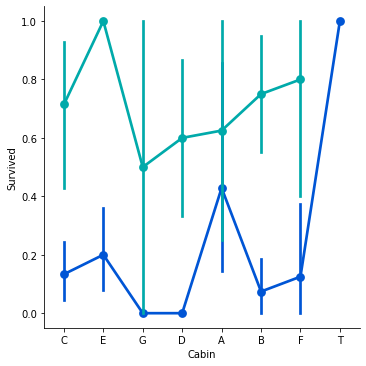

In [115]:
#Answer to question1
#plot the survival rate alongside the passenger, and pass deck as hue
sns.catplot(x="Cabin", y=titanic_df["Survived"],  data=cabin_df, palette="winter", hue=titanic_df["Sex"], kind="point").add_legend()

In [102]:
 value_count = DataFrame(cabin_df.value_counts())
value_count

,0
Cabin,
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


In [103]:
titanic_df["Cabin"].dropna()

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

In [107]:
grouped_by_cabin = titanic_df["Cabin"].groupby(by=cabin_df)

ValueError: Grouper for '<class 'pandas.core.frame.DataFrame'>' not 1-dimensional

,Cabin
0,C
1,C
2,E
3,G
4,C
...,...
199,D
200,B
201,C
202,B
